In [2]:
import pandas as pd
dataset=pd.read_csv('tweets.csv',encoding='ISO-8859-1')
dataset.head(3)

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False


In [3]:
dataset.shape

(14940, 16)

In [4]:
def gen_freq(text):
    word_list=[]
    for tw_words in text.split():
        word_list.extend(tw_words)
    word_freq=pd.Series(word_list).value_counts()
    word_freq[:10]
    return word_freq

In [5]:
word_freq=gen_freq(dataset.text.str)
word_freq

RT                         11053
to                          7650
is                          5152
in                          4491
the                         4331
                           ...  
#News                          1
notes|                         1
https://t.co/ECl4oIzdHA        1
https://t.co/9MjFtLtCtR        1
https://t.co/hwgqjbqgvG        1
Length: 19601, dtype: int64

In [6]:
!pip install wordcloud

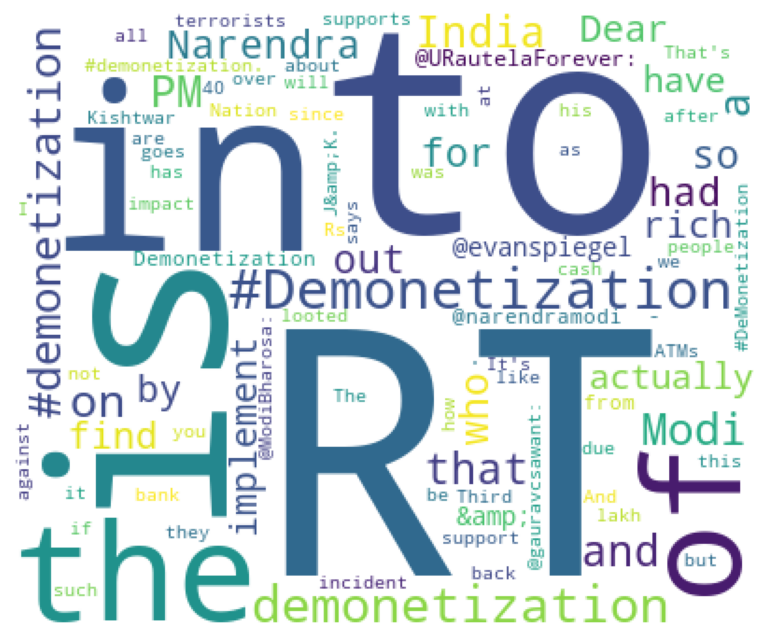

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc=WordCloud(width=400,height=330,max_words=200,background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(12,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [9]:
import re
def clean_text(text):
    text=re.sub(r'RT','',text)
    text=re.sub(r'&amp;','',text)
    text=re.sub(r'[?!.;:,#@-]','',text)
    text=text.lower()
    text=re.sub(r'\d+','',text)
    text=re.sub(r'%','',text)
    return text

In [10]:
from wordcloud import STOPWORDS
print(STOPWORDS)

{'while', 'else', 'a', 'so', "haven't", "he'll", 'my', 'would', 'yourself', 'them', 'after', 'again', "couldn't", 'off', 'few', 'same', 'who', "she'd", 'themselves', 'therefore', "wouldn't", 'do', "shan't", "i'm", 'him', 'where', 'your', 'an', 'shall', 'above', 'over', 'then', 'are', 'does', "hasn't", 'when', "she's", 'he', 'had', "don't", 'up', 'whom', 'during', 'k', "they're", "we'd", 'yourselves', 'itself', 'because', 'doing', 'were', "why's", 'i', "hadn't", 'to', 'having', 'we', 'not', 'how', 'own', 'the', "didn't", 'ought', 'all', 'com', "they'd", 'should', 'each', 'most', 'this', 'it', 'as', 'she', 'hers', "can't", 'some', "i'll", 'on', 'their', "there's", "here's", "mustn't", 'like', 'these', 'once', "we're", "when's", 'both', "we'll", 'very', 'of', 'for', "they've", "isn't", 'his', 'cannot', "won't", 'and', 'at', 'just', 'other', 'herself', 'about', 'here', "let's", 'been', "shouldn't", "that's", 'out', 'did', "i've", "it's", 'nor', 'such', 'her', 'however', 'otherwise', 'into'

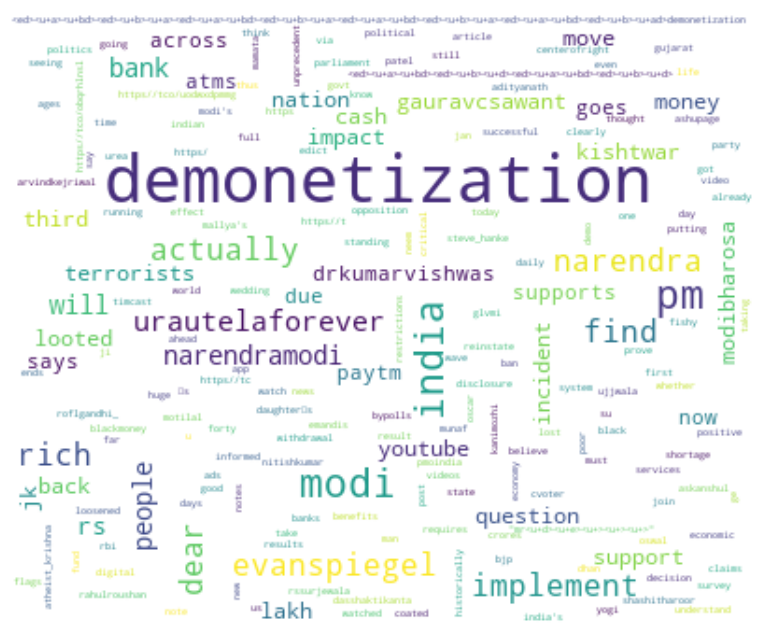

In [12]:
text=dataset.text.apply(lambda x:clean_text(x))
word_freq=gen_freq(text.str)
word_freq=word_freq.drop(labels=STOPWORDS,errors='ignore')
wc=WordCloud(width=400,height=330,max_words=200,background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(12,8))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()